In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [2]:
############ DATA & TRANSFORMS

from data import get_data
from device import get_device

device = get_device(force_cpu=False)


horizontal_flip_prob = 0.2
vertical_flip_prob = 0.0
gaussian_blur_prob = 0.0
rotate_degree = 20
cutout = 0.3
#
transform_args = {}


transform_args['horizontal_flip_prob'] =  0.2
transform_args['vertical_flip_prob'] = 0.0
transform_args['gaussian_blur_prob'] = 0.0
transform_args['rotate_degree'] = 20
transform_args['cutout'] = 0.3
transform_args['cutout_height'] = 16
transform_args['cutout_width'] = 16


train_loader, test_loader = get_data(device,transform_args,batch_size=64 )

Files already downloaded and verified
Files already downloaded and verified


In [8]:
train_loader.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
##################### MODEL

from model2 import ResNet18
from torchsummary import summary
model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [5]:
from run import run_model

epochs = 20
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_loader, test_loader, epochs, device, **regularization)


Epoch 1:
(TRAIN) batch_number:  100 Loss : 1.845 Acc : 0.30297
(TRAIN) batch_number:  200 Loss : 1.378 Acc : 0.36766
(TRAIN) batch_number:  300 Loss : 1.381 Acc : 0.4013
(TRAIN) batch_number:  400 Loss : 1.283 Acc : 0.42953
(TRAIN) batch_number:  500 Loss : 1.072 Acc : 0.45363
(TRAIN) batch_number:  600 Loss : 1.18 Acc : 0.47497
(TRAIN) batch_number:  700 Loss : 1.012 Acc : 0.49161
(TEST) Correct_classified :  6515  of 10000
(TEST) Loss : 0.9854 Acc : 0.6515

 ************************************************************ 


Epoch 2:
(TRAIN) batch_number:  100 Loss : 0.9325 Acc : 0.64219
(TRAIN) batch_number:  200 Loss : 1.086 Acc : 0.65141
(TRAIN) batch_number:  300 Loss : 1.185 Acc : 0.6563
(TRAIN) batch_number:  400 Loss : 0.898 Acc : 0.66094
(TRAIN) batch_number:  500 Loss : 1.039 Acc : 0.66659
(TRAIN) batch_number:  600 Loss : 0.9296 Acc : 0.67193
(TRAIN) batch_number:  700 Loss : 0.7431 Acc : 0.67538
(TEST) Correct_classified :  7128  of 10000
(TEST) Loss : 0.8052 Acc : 0.7128

 *

(TRAIN) batch_number:  400 Loss : 0.2559 Acc : 0.92234
(TRAIN) batch_number:  500 Loss : 0.2628 Acc : 0.92306
(TRAIN) batch_number:  600 Loss : 0.1756 Acc : 0.92344
(TRAIN) batch_number:  700 Loss : 0.2331 Acc : 0.92442
(TEST) Correct_classified :  8754  of 10000
(TEST) Loss : 0.3726 Acc : 0.8754

 ************************************************************ 


Epoch 17:
(TRAIN) batch_number:  100 Loss : 0.2796 Acc : 0.92281
(TRAIN) batch_number:  200 Loss : 0.1375 Acc : 0.92352
(TRAIN) batch_number:  300 Loss : 0.1479 Acc : 0.9226
(TRAIN) batch_number:  400 Loss : 0.1092 Acc : 0.92418
(TRAIN) batch_number:  500 Loss : 0.2134 Acc : 0.92456
(TRAIN) batch_number:  600 Loss : 0.1661 Acc : 0.92471
(TRAIN) batch_number:  700 Loss : 0.2587 Acc : 0.92493
(TEST) Correct_classified :  8768  of 10000
(TEST) Loss : 0.3699 Acc : 0.8768

 ************************************************************ 


Epoch 18:
(TRAIN) batch_number:  100 Loss : 0.2642 Acc : 0.92031
(TRAIN) batch_number:  200 Loss :

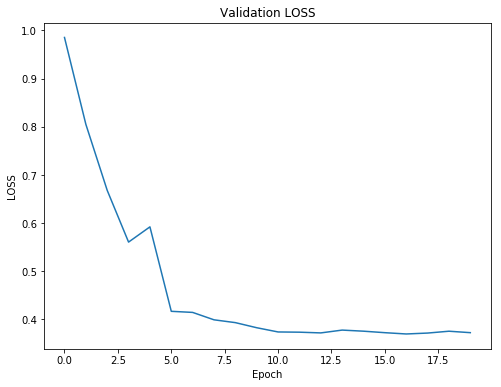

In [207]:
import matplotlib.pyplot as plt

metric = 'LOSS'
# Initialize a figure
fig = plt.figure(figsize=(8, 6))

# Plot values
plain_plt, = plt.plot(test_trackers['test_losses'])


# Set plot title
plt.title(f'Validation {metric}')

# Label axes
plt.xlabel('Epoch')
plt.ylabel(metric)

# Set legend
location = 'upper' if metric == 'Loss' else 'lower'


In [7]:
torch.save(model.state_dict() , 'C://Users//saina//Documents//EVA//S9//trained.pt') 

# GRAD CAM

In [41]:
list(model.children())

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (shortcut): Sequential()
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (shortcut)

In [44]:
list(model.children())[:-2]

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (shortcut): Sequential()
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (shortcut)

In [45]:
class ModelGradCam(nn.Module):
    
    def __init__(self,model):
        super().__init__()
        
        # get the pretrained resnet network
        self.res = model
        
        # disect the network to access its last convolutional layer
        self.features_conv = nn.Sequential(*list(self.res.children())[:-2])
        
        # # get the max pool of the features stem
        # self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
        # get the classifier of the resnet
        self.classifier1 = list(self.res.children())[-2:][0]
        self.classifier2 = list(self.res.children())[-2:][1]

        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        
        # register the hook
        h = x.register_hook(self.activations_hook)

        # apply the remaining pooling
        x = self.classifier1(x)
        x = F.avg_pool2d(x, 4)
        x = x.view(x.size(0), -1)
        x = self.classifier2(x)
        return x
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return self.gradients
    
    # method for the activation exctraction
    def get_activations(self, x):
        return self.features_conv(x)

In [173]:
from data import Transforms

from torchvision import datasets

test_transforms = Transforms(train=False, **transform_args)

data = datasets.ImageFolder("./test", test_transforms)

sample_loader = torch.utils.data.DataLoader(data, batch_size = 1, shuffle=False, num_workers=4)

In [174]:
sample_loader.dataset.classes

['cat', 'dog']

In [52]:
device2 = torch.device("cpu")

In [176]:
for img,label in sample_loader:
    img = img.to(device)

In [177]:
img.shape

torch.Size([1, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


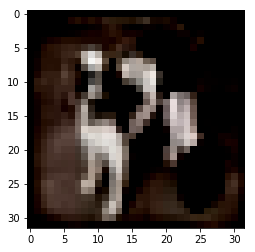

In [180]:
plt.imshow(np.transpose(img.squeeze().cpu().data.numpy() , (1,2,0)))

In [189]:
# initialize the resnet model
res = ModelGradCam(model)

# set the evaluation mode
res.eval()

# get the most likely prediction of the model
pred = res(img)

aaaaaa
bbbbbb
torch.Size([1, 256, 8, 8])
before linear torch.Size([1, 512, 4, 4])
cccccc


In [190]:
pred

tensor([[ 0.8898, -0.7844, -4.0727,  3.8725, -5.8945, 13.1918, -6.0310,  2.1498,
         -4.6134, -0.4906]], device='cuda:0', grad_fn=<AddmmBackward>)

In [191]:
# get the gradient of the output with respect to the parameters of the model
pred[:,5].backward()

In [192]:
# pull the gradients out of the model
gradients = res.get_activations_gradient()

In [193]:
# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

In [194]:
# get the activations of the last convolutional layer
activations = res.get_activations(img).detach()

In [195]:
pooled_gradients.shape

torch.Size([256])

In [196]:
activations.shape

torch.Size([1, 256, 8, 8])

In [197]:
# weight the channels by corresponding gradients

for i in range(256):
    activations[:, i, :, :] *= pooled_gradients[i]

In [198]:
# weight the channels by corresponding gradients

heatmap = torch.mean(activations, dim=1).squeeze()
heatmap.shape

torch.Size([8, 8])

In [199]:
# relu on top of the heatmap
# expression (2) in https://arxiv.org/pdf/1610.02391.pdf
heatmap = np.maximum(heatmap.cpu(), 0)
heatmap.shape

torch.Size([8, 8])

In [200]:
heatmap /= torch.max(heatmap)

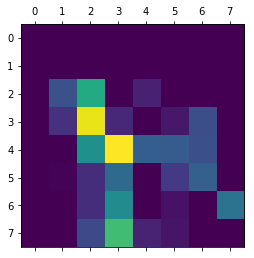

In [201]:
# normalize the heatmap
import matplotlib.pyplot as plt

plt.matshow(heatmap.squeeze())

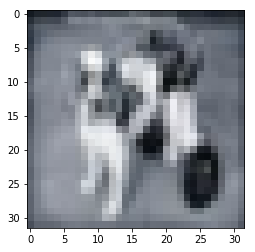

In [204]:
## interpolate the heat-map and project it onto the original image

import cv2
img = cv2.imread('.\\test\\dog\\dog1.png')
plt.imshow(img)

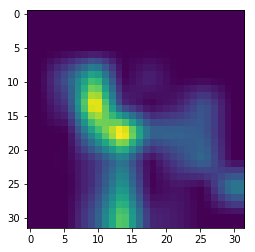

In [205]:
heatmap_numpy_resized = cv2.resize(heatmap.cpu().data.numpy(), (img.shape[1], img.shape[0]))
heatmap_rescaled = np.uint8(255 * heatmap_numpy_resized)

plt.imshow(heatmap_rescaled)

In [206]:
heatmap_final = cv2.applyColorMap(heatmap_rescaled, cv2.COLORMAP_JET)
superimposed_img = heatmap_final * 0.4 + img
cv2.imwrite('.\\Gradcam_out\\map.jpg', superimposed_img)

True

In [100]:
superimposed_img.shape

(32, 32, 3)